# 성능 향상 기법

데이터의 확인과 검증셋

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옴
df = pd.read_csv("./data/wine.csv", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [4]:
# 학습셋과 테스트셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# 모델을 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델을 실행
# 0.8 x 0.25 = 0.2
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

/home/kunsu/miniconda3/envs/fast/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1745659938.391249  151385 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7769 - loss: 0.3693 - val_accuracy: 0.8954 - val_loss: 0.3354
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8897 - loss: 0.3144 - val_accuracy: 0.8846 - val_loss: 0.2847
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9095 - loss: 0.2753 - val_accuracy: 0.9031 - val_loss: 0.2606
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9211 - loss: 0.2500 - val_accuracy: 0.9392 - val_loss: 0.2370
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9381 - loss: 0.2222 - val_accuracy: 0.9300 - val_loss: 0.2183
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9388 - loss: 0.2049 - val_accuracy: 0.9331 - val_loss: 0.2024
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9350 - loss: 0.1917 - val_accuracy: 0.9415 - val_loss: 0.1896
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9426 - loss: 0.1736 - val_accuracy: 0.9469 - val_loss: 0.1788
Epoch 9

In [5]:
# 테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.1150 
Test accuracy: 0.9561538696289062


# 모델 업데이트 하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv("./data/wine.csv", header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

2025-04-26 18:37:22.979115: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 18:37:22.988262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745660242.997774  197983 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745660243.000475  197983 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745660243.008423  197983 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 모델 저장의 조건을 설정
# model_path = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
model_path = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1)

# 모델을 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.2469.keras

Epoch 2: saving model to ./data/model/all/02-0.2469.keras

Epoch 3: saving model to ./data/model/all/03-0.2546.keras

Epoch 4: saving model to ./data/model/all/04-0.8831.keras

Epoch 5: saving model to ./data/model/all/05-0.8800.keras

Epoch 6: saving model to ./data/model/all/06-0.9062.keras

Epoch 7: saving model to ./data/model/all/07-0.9146.keras

Epoch 8: saving model to ./data/model/all/08-0.9162.keras

Epoch 9: saving model to ./data/model/all/09-0.9223.keras

Epoch 10: saving model to ./data/model/all/10-0.9262.keras

Epoch 11: saving model to ./data/model/all/11-0.9269.keras

Epoch 12: saving model to ./data/model/all/12-0.9285.keras

Epoch 13: saving model to ./data/model/all/13-0.9315.keras

Epoch 14: saving model to ./data/model/all/14-0.9292.keras

Epoch 15: saving model to ./data/model/all/15-0.9292.keras

Epoch 16: saving model to ./data/model/all/16-0.9277.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [4]:
# 테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9489 - loss: 0.1589 
Test accuracy: 0.9515384435653687


# 그래프로 과적합 확인하기

In [5]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9423 - loss: 0.1742 - val_accuracy: 0.9369 - val_loss: 0.1857
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9374 - loss: 0.1806 - val_accuracy: 0.9354 - val_loss: 0.1850
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9464 - loss: 0.1672 - val_accuracy: 0.9377 - val_loss: 0.1845
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9418 - loss: 0.1729 - val_accuracy: 0.9346 - val_loss: 0.1829
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9382 - loss: 0.1831 - val_accuracy: 0.9369 - val_loss: 0.1820
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9400 - loss: 0.1757 - val_accuracy: 0.9369 - val_loss: 0.1809
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9445 - loss: 0.1616 - val_accuracy: 0.9369 - val_loss: 0.1796
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9443 - loss: 0.1632 - val_accuracy: 0.9369 - val_loss

In [7]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.939441,0.176416,0.936923,0.185668
1,0.940467,0.175123,0.935385,0.185016
2,0.941237,0.174186,0.937692,0.184537
3,0.941493,0.173272,0.934615,0.182890
4,0.941237,0.172698,0.936923,0.182017
...,...,...,...,...
1995,0.991275,0.024801,0.984615,0.124154
1996,0.993585,0.020364,0.987692,0.116432
1997,0.994868,0.016998,0.986923,0.117254
1998,0.996408,0.014655,0.989231,0.118852


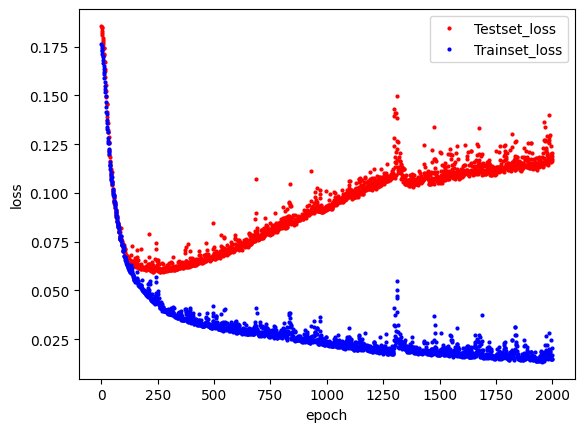

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df["val_loss"]

# y_loss에 학습셋의 오차를 저장
y_loss = hist_df["loss"]

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv("./data/wine.csv", header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

# 모델을 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/home/kunsu/miniconda3/envs/fast/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

# 학습의 자동 중단 및 베스트 모델 저장

In [11]:
# 학습이 언제 자동 중단될지를 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름 설정
# modelpath = "./data/model/Bestmodel.hdf5"
modelpath = "./data/model/Bestmodel.keras"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=0, save_best_only=True)

# 모델을 실행
history = model.fit(
    X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer]
)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2566 - loss: 3.3264 - val_accuracy: 0.6777 - val_loss: 0.8332
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7454 - loss: 0.6041 - val_accuracy: 0.8023 - val_loss: 0.3908
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8101 - loss: 0.3695 - val_accuracy: 0.8162 - val_loss: 0.4144
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8199 - loss: 0.3744 - val_accuracy: 0.8254 - val_loss: 0.3935
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8332 - loss: 0.3538 - val_accuracy: 0.8492 - val_loss: 0.3302
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8708 - loss: 0.2865 - val_accuracy: 0.9062 - val_loss: 0.2733
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9149 - loss: 0.2403 - val_accuracy: 0.9192 - val_loss: 0.2623
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9272 - loss: 0.2385 - val_accuracy: 0.9223 - val

In [12]:
# 테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9847 - loss: 0.0795 
Test accuracy: 0.9792307615280151
